<a href="https://colab.research.google.com/github/Khadeeja-Moin/Colab---VGG19/blob/main/Attempt%204/VGg_19_(Preprocessed_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import MaxPooling2D

In [19]:
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3'
test_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing3'

In [5]:
# re-size all the images to this because images in dataset are f varying sizes
IMAGE_SIZE = [224, 224]

In [6]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
# Images in our dataset are gray-scale

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# include_top = False actually drops first and last layer of model
# My first layer should be 224 * 224 (Image dimension)
# My last year will have 4 classes according to dataset

80134624/80134624 [==============================] - 0s 0us/step


In [7]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [8]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(4,activation="softmax"))  # 4 Neurons in the Output Layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'training')


Found 4571 images belonging to 4 classes.


In [24]:
validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'validation')

Found 1141 images belonging to 4 classes.


In [25]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing3',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [26]:
# fit the model
# Run the cell. It will take some time to execute

tf.keras.backend.clear_session()
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Models/vgg19_3channel_5k.keras',
                                                monitor='accuracy', verbose=1,
                                                mode='max',save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="accuracy", mode="max", restore_best_weights=True, patience=7)
callbacks_list = [checkpoint,early]

history = model.fit(training_set, epochs=20, callbacks=callbacks_list, validation_data = validation_set)

Epoch 1/20
143/143 [==============================] - ETA: 0s - loss: 0.3564 - accuracy: 0.8617
Epoch 1: accuracy improved from -inf to 0.86174, saving model to /content/drive/MyDrive/Colab Notebooks/Models/vgg19_3channel_5k.keras
143/143 [==============================] - 332s 2s/step - loss: 0.3564 - accuracy: 0.8617 - val_loss: 0.5893 - val_accuracy: 0.7914
Epoch 2/20
143/143 [==============================] - ETA: 0s - loss: 0.3133 - accuracy: 0.8801
Epoch 2: accuracy improved from 0.86174 to 0.88011, saving model to /content/drive/MyDrive/Colab Notebooks/Models/vgg19_3channel_5k.keras
143/143 [==============================] - 316s 2s/step - loss: 0.3133 - accuracy: 0.8801 - val_loss: 0.4930 - val_accuracy: 0.8116
Epoch 3/20
143/143 [==============================] - ETA: 0s - loss: 0.3006 - accuracy: 0.8906
Epoch 3: accuracy improved from 0.88011 to 0.89061, saving model to /content/drive/MyDrive/Colab Notebooks/Models/vgg19_3channel_5k.keras
143/143 [============================

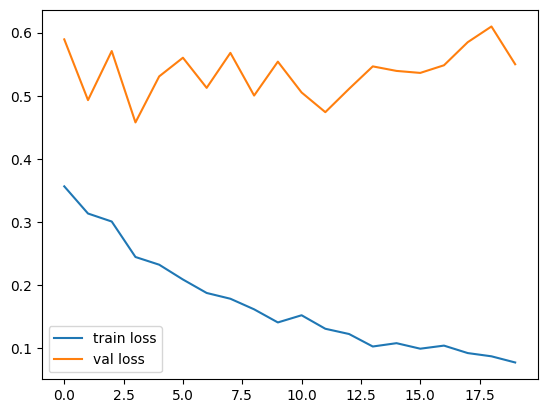

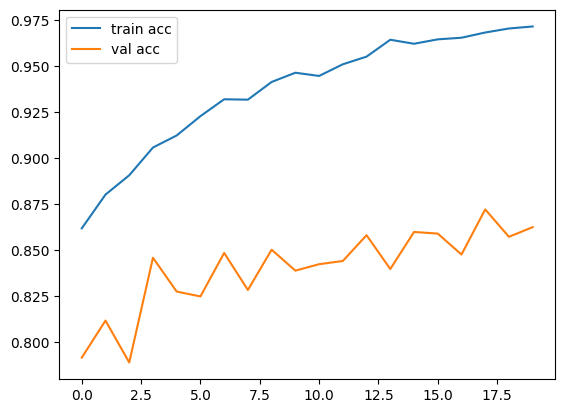

<Figure size 640x480 with 0 Axes>

In [27]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

41/41 [==============================] - 346s 9s/step - loss: 0.3313 - accuracy: 0.9092
Test Loss: 0.3312849700450897
Test Accuracy: 0.909229576587677


# Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [30]:
def get_labels_and_predictions(generator, model):
    true_labels = []
    predictions = []

    # Iterate over the generator
    for i in range(len(generator)):
        x_batch, y_batch = generator[i]
        y_pred = model.predict(x_batch)

        true_labels.extend(np.argmax(y_batch, axis=1))  # Assuming y_batch is one-hot encoded
        predictions.extend(np.argmax(y_pred, axis=1))

    return np.array(true_labels), np.array(predictions)


In [31]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

In [34]:
# Get true labels and predictions for the training set
true_labels_train, predictions_train = get_labels_and_predictions(training_set, model)

# Get true labels and predictions for the test set
true_labels_test, predictions_test = get_labels_and_predictions(test_set, model)

1/1 [==============================] - 0s 359ms/step


In [35]:
# Compute the confusion matrices
cm_train = confusion_matrix(true_labels_train, predictions_train)
cm_test = confusion_matrix(true_labels_test, predictions_test)

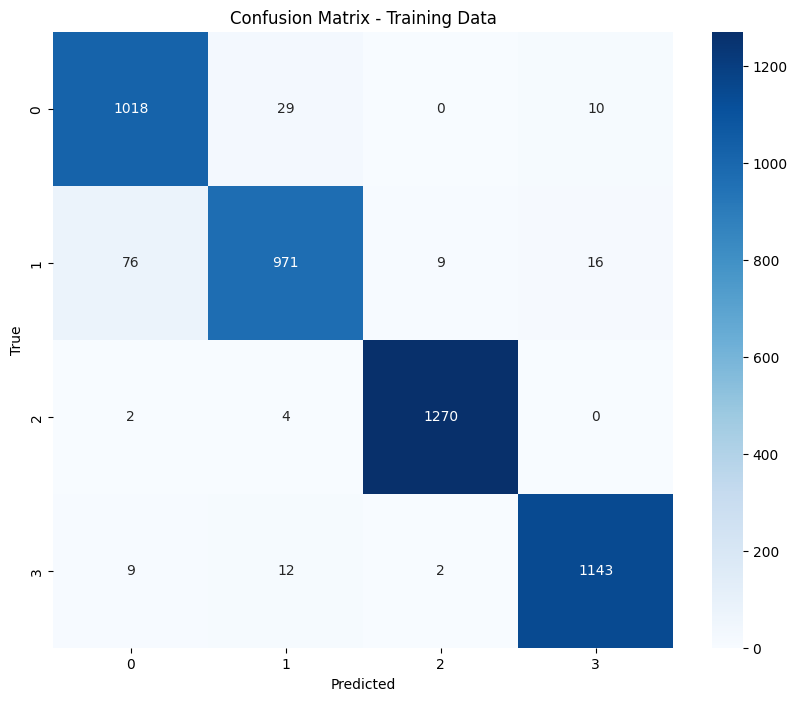

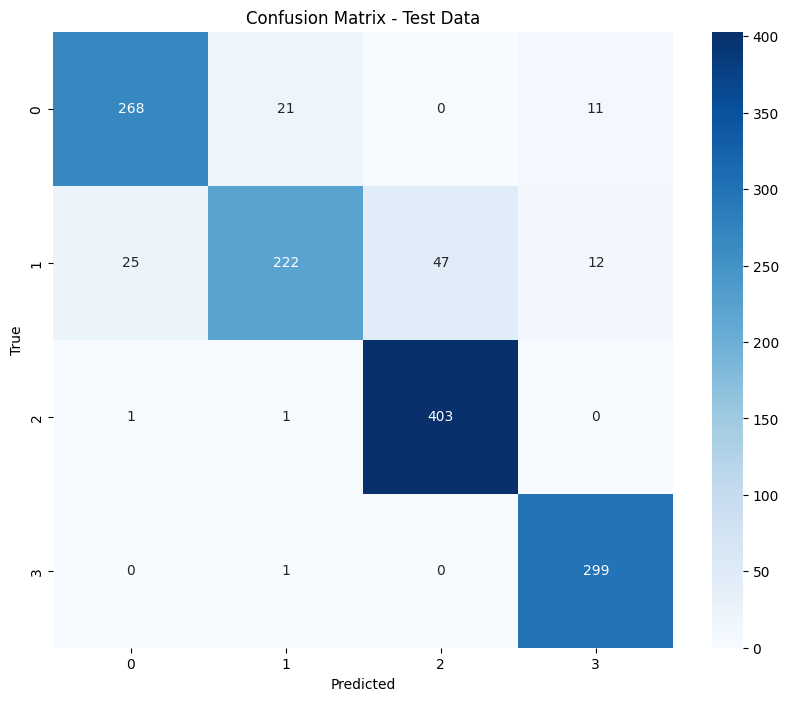

In [36]:
# Plot the confusion matrices
plot_confusion_matrix(cm_train, title='Confusion Matrix - Training Data')
plot_confusion_matrix(cm_test, title='Confusion Matrix - Test Data')

# Precision, Recall, F1-score

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [38]:
# For training data
precision_train = precision_score(true_labels_train, predictions_train, average='weighted')
recall_train = recall_score(true_labels_train, predictions_train, average='weighted')
f1_train = f1_score(true_labels_train, predictions_train, average='weighted')

print(f'Training Precision: {precision_train}')
print(f'Training Recall: {recall_train}')
print(f'Training F1 Score: {f1_train}')

# For test data
precision_test = precision_score(true_labels_test, predictions_test, average='weighted')
recall_test = recall_score(true_labels_test, predictions_test, average='weighted')
f1_test = f1_score(true_labels_test, predictions_test, average='weighted')

print(f'Test Precision: {precision_test}')
print(f'Test Recall: {recall_test}')
print(f'Test F1 Score: {f1_test}')

Training Precision: 0.96333592856313
Training Recall: 0.9630277838547364
Training F1 Score: 0.9629159809785777
Test Precision: 0.9092404925356868
Test Recall: 0.9092295957284515
Test F1 Score: 0.9057956629875705


In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19_preprocessed.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('model_vgg19_preprocessed.keras')
